<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [8]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [9]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [10]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


## Task 2: Generate Descriptive Statistics and Visualizations

### for the "median value of owner-occupied homes" provide a boxplot

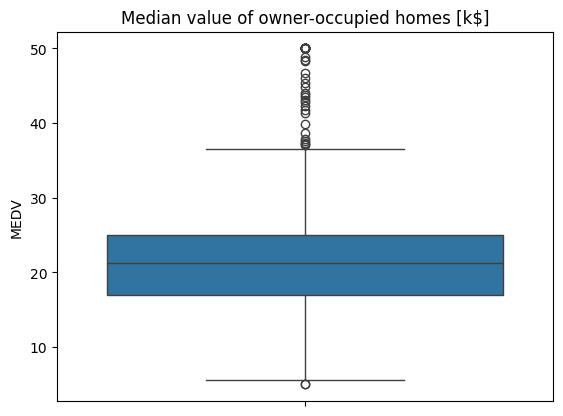

In [25]:
plt.title('Median value of owner-occupied homes [k$]')
ax=sns.boxplot(x=None,y='MEDV',data=boston_df)

The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers”

### provide a bar plot for the Charles river variable

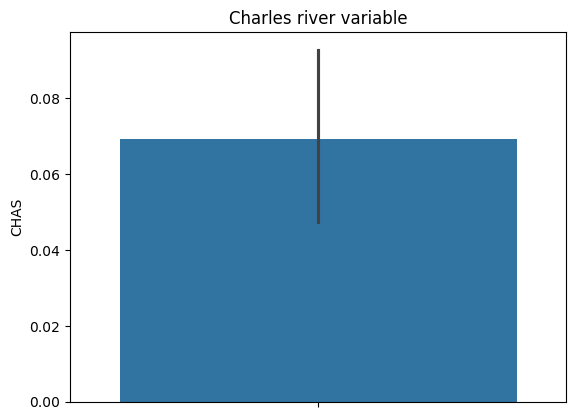

In [23]:
plt.title('Charles river variable')
ax=sns.barplot(x=None,y="CHAS",data=boston_df)

I cannot quite understand what significance can be attached to this plot. I guess the instructions are incorrect.

### provide a boxplot for the MEDV variable vs the AGE variable (discretize the age variable as...)

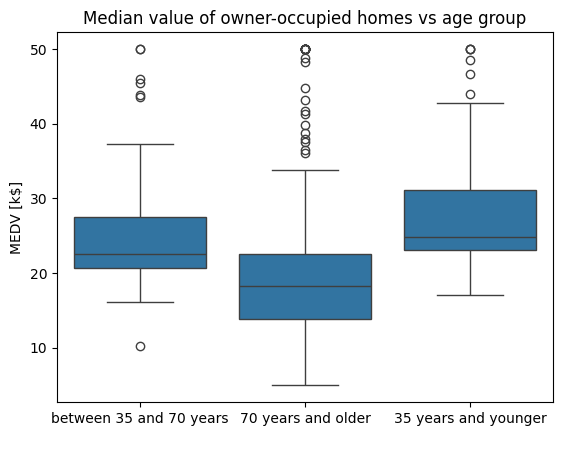

In [26]:
boston_df.loc[(boston_df['AGE']<=35),'age_group']='35 years and younger'
boston_df.loc[(boston_df['AGE']>35)&(boston_df['AGE']<70),'age_group']='between 35 and 70 years'
boston_df.loc[(boston_df['AGE']>=70),'age_group']='70 years and older'

plt.xlabel(' ')
plt.ylabel('MEDV [k$]')
plt.title('Median value of owner-occupied homes vs age group')
ax=sns.boxplot(x='age_group',y='MEDV',data=boston_df)

This plot is the same as above, but with a breakdown according to age. This indicates that the distribution of the variable MEDV does bear a dependency on variable AGE.

### provide a scatter plot to show the relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

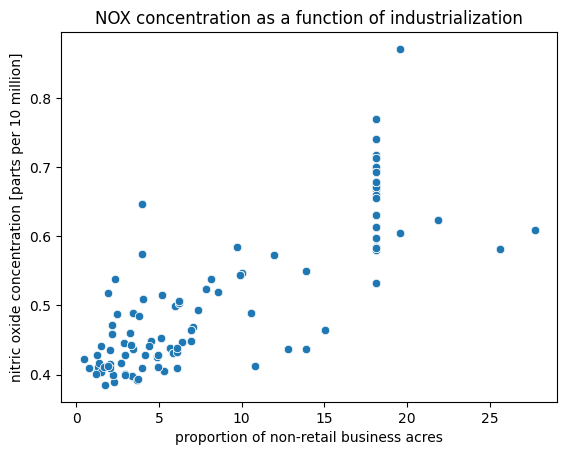

In [27]:
plt.xlabel('proportion of non-retail business acres')
plt.ylabel('nitric oxide concentration [parts per 10 million]')
plt.title('NOX concentration as a function of industrialization')
ax=sns.scatterplot(x='INDUS',y='NOX',data=boston_df)

This plot shows a positive correlation between 'industrialization' and 'pollution'

### create a histogram for the pupil-to-teacher ratio

<Figure size 640x480 with 0 Axes>

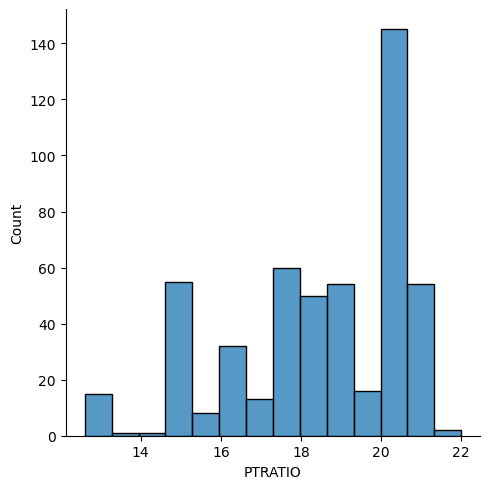

In [39]:
plt.xlabel('pupil-teacher ratio')
plt.ylabel('frequency')
plt.title('distribution of the pupil-teacher ratio')
plt.clf()
ax=sns.displot(boston_df['PTRATIO'])

Not sure what explanation one is supposed to provide here. The only meaningful comment I would make is that the distribution is unlikely to be normal.

## Task 3: Use the appropriate tests to answer the questions provided

### is there a siginificant difference in median value of houses bounded by the Charles river? (T-test)

In [41]:
chas0=boston_df[boston_df['CHAS']==0]['MEDV']
chas1=boston_df[boston_df['CHAS']==1]['MEDV']

let us just assume that the two distributions are normal

In [43]:
scipy.stats.levene(chas0,chas1,center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

because the p-value is <alpha=0.05, the null hypothesis that the variances of the two distributions are the same is rejected at confidence level alpha

In [44]:
scipy.stats.ttest_ind(chas0,chas1,equal_var=False)

TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

because the p-value is <alpha=0.05, the null hypothesis that the means of the two distributions are the same is rejected at confidence level alpha

There is therefore indication for the validity of the alternative hypothesis that the means of the two distributions are not the same.

In other words, there is evidence that proximity to the Charles river influences house value

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [48]:
MEDV_young=boston_df[boston_df['age_group']=='35 years and younger']['MEDV']
MEDV_middle=boston_df[boston_df['age_group']=='between 35 and 70 years']['MEDV']
MEDV_old=boston_df[boston_df['age_group']=='70 years and older']['MEDV']
anova=scipy.stats.f_oneway(MEDV_young,MEDV_middle,MEDV_old)
print(anova)

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)


because the p-value is <alpha=0.05, the null hypothesis that the means of the three distributions are the same is rejected at confidence level alpha

There is therefore indication for the validity of the alternative hypothesis that the means of the three distributions are not all the same

In other words, the impression one got from eyeballing the boxplots above is correct: there is a dependency of MEDV on AGE

### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [49]:
pearson=scipy.stats.pearsonr(boston_df['INDUS'],boston_df['NOX'])
print(pearson)

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)


because the p-value is <alpha=0.05, the null hypothesis that the there is no correlation between the two variables is rejected at confidence level alpha

There is therefore indication for the validity of the alternative hypothesis that there is correlation

In other words, as far as we can see greater 'industrialization' does make for more 'pollution'

### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [50]:
X=boston_df['DIS']
y=boston_df['MEDV']
X=sm.add_constant(X)
model=sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 29 May 2024   Prob (F-statistic):           1.21e-08
Time:                        12:45:34   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

There is evidence (at confidence level alpha=0.05) of a positive correlation between the two variables

The coefficient 1.0916 indicates that MEDV roughly increases by one unit [k$] with one unit of DIS [unit unspecified, maybe miles?]